# stage 2 female averaged

In [1]:
import numpy as np
import subprocess
import matplotlib.pyplot as plt
import pandas as pd

from functions_lick_rates import (plot_averaged)

In [2]:
HD_mouse = ['466029_f3', '475165_f3', '475165_f7']
WT_mouse = ['475165_f1', '475165_f5']

In [3]:
# Combine both HD and WT mice
all_mice = HD_mouse + WT_mouse

# Loop through each mouse and execute the corresponding notebook
for mouse in all_mice:
    notebook_name = f"stage2_{mouse}_lick_rates.ipynb"
    
    # Run the notebook and save the executed version as 'executed_notebook_'
    command = f'jupyter nbconvert --to notebook --execute {notebook_name} --output executed_{notebook_name}'
    
    # Execute the command
    subprocess.run(command, shell=True)

print("All notebooks executed successfully.")


All notebooks executed successfully.


# HD averaged

In [4]:
# List to hold dataframes
HD_data_list = []

# Load the .npy data for each mouse (HD)
for mouse in HD_mouse:
    file_path = f"X:/RaymondLab/1_Kai/3_processed_data/7_lick_rate_csv/lick_rate_stage2_{mouse}.npy"
    try:
        # Load the .npy file into a numpy array
        data = np.load(file_path)
        
        # Create a DataFrame from the data
        HD_df = pd.DataFrame(data, columns=['day_number', 'left_lick', 'right_lick', 'total', 'left_nogo', 'right_nogo', 'total_nogo'])
        
        # Append the dataframe to the list
        HD_data_list.append(HD_df)
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Concatenate all dataframes into a single dataframe
all_HD_data = pd.concat(HD_data_list)

# Group by 'day_number' and calculate the mean for each column (except 'day_number')
average_HD_data = all_HD_data.groupby('day_number').mean().reset_index()

# Optionally, you can save the average data to a CSV file
average_HD_data.to_csv("X:/RaymondLab/1_Kai/3_processed_data/7_lick_rate_csv/average_HD_data.csv", index=False)

# Print the averaged data
print(average_HD_data)

    day_number  left_lick  right_lick      total  left_nogo  right_nogo  \
0          1.0  84.612573   36.000000  62.036091  10.897436   50.925926   
1          2.0  79.442249   56.255051  66.234732  35.016835   65.925926   
2          3.0  86.068045   75.569535  79.789410   7.792208   17.037037   
3          4.0  87.596899   93.383017  89.385086   6.666667    3.030303   
4          5.0  92.162162   59.526075  74.691894   6.666667   41.898148   
5          6.0  73.783784   46.127147  59.503675  14.814815   36.825397   
6          7.0  79.166667   75.489245  77.253611  20.634921   37.412587   
7          8.0  71.278468   95.998324  83.255314  25.000000    6.666667   
8          9.0  80.208333   43.367003  59.708368  33.888889   57.575758   
9         10.0  86.625087   93.224932  90.230769   9.090909    9.375000   
10        11.0  50.092235   71.712200  61.808775  42.083333   28.585859   
11        12.0  74.990772   77.463550  75.784117  18.614719   31.250000   
12        13.0  27.645727

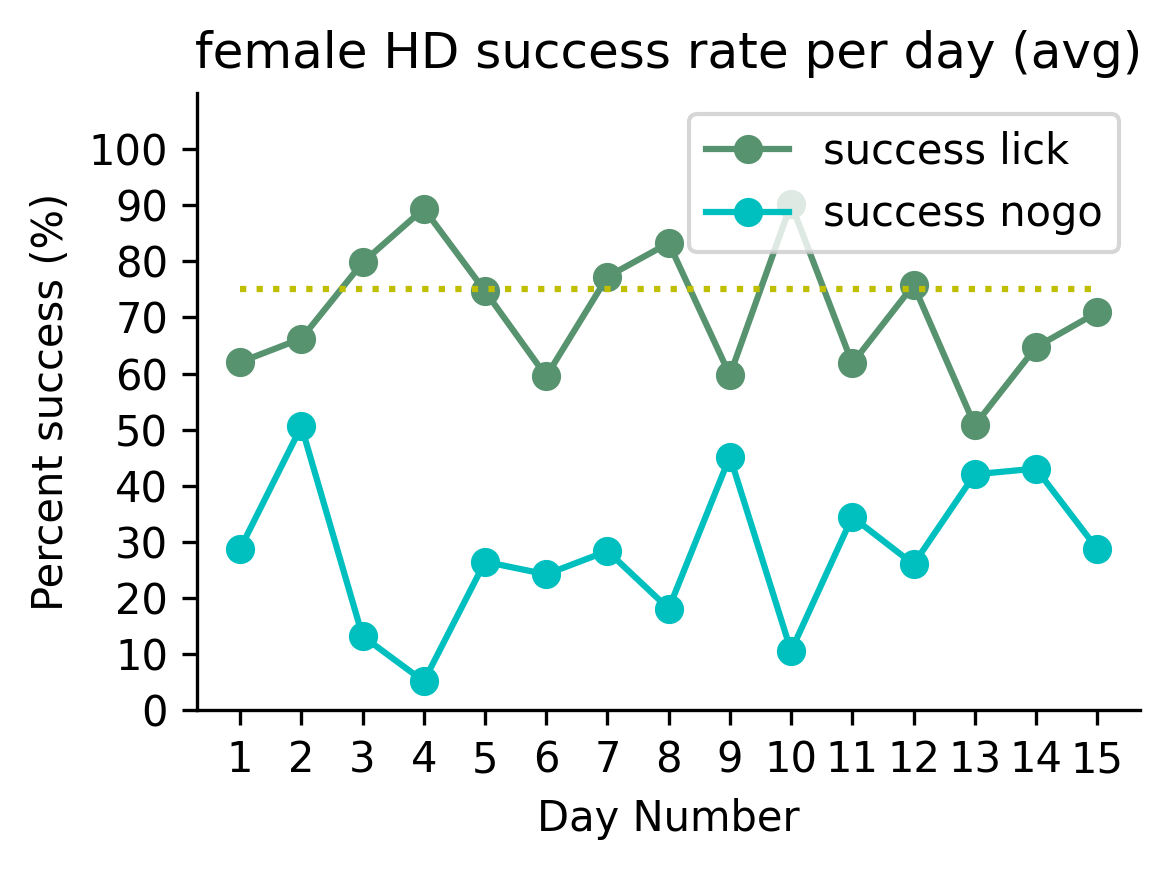

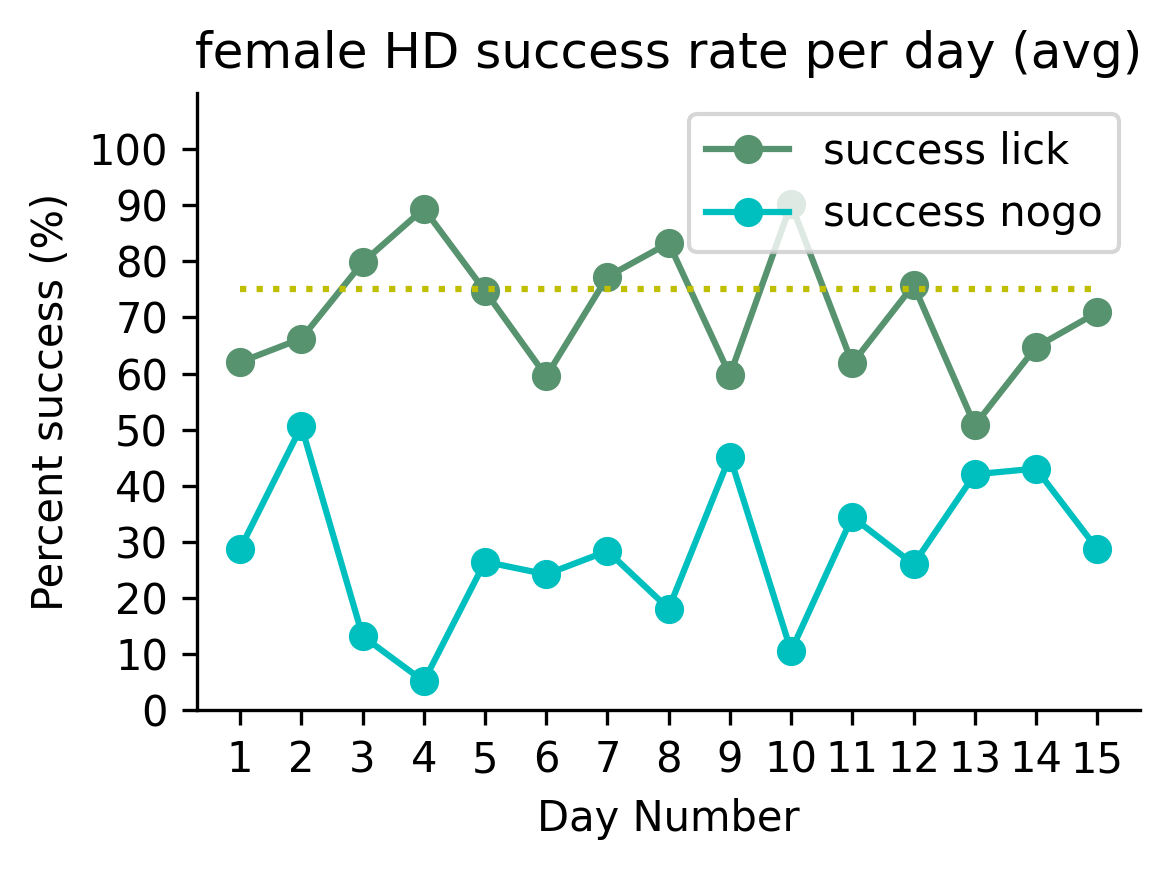

In [14]:
plot_averaged(average_HD_data, condition="HD", nogo = "TRUE", export_path_nogo=f"X:/RaymondLab/1_Kai/3_processed_data/7_lick_rate_csv/exported_figures/female_HD_averaged_lick_rates.png", dpi=300)

# WT averaged

In [6]:
# List to hold dataframes
WT_data_list = []

# Load the .npy data for each mouse (HD)
for mouse in WT_mouse:
    file_path = f"X:/RaymondLab/1_Kai/3_processed_data/7_lick_rate_csv/lick_rate_stage2_{mouse}.npy"
    try:
        # Load the .npy file into a numpy array
        WT_data = np.load(file_path)
        
        # Create a DataFrame from the data
        WT_df = pd.DataFrame(WT_data, columns=['day_number', 'left_lick', 'right_lick', 'total', 'left_nogo', 'right_nogo', 'total_nogo'])
        
        # Append the dataframe to the list
        WT_data_list.append(WT_df)
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Concatenate all dataframes into a single dataframe
all_WT_data = pd.concat(WT_data_list)

# Group by 'day_number' and calculate the mean for each column (except 'day_number')
average_WT_data = all_WT_data.groupby('day_number').mean().reset_index()

# Optionally, you can save the average data to a CSV file
average_WT_data.to_csv("X:/RaymondLab/1_Kai/3_processed_data/7_lick_rate_csv/average_WT_data.csv", index=False)

# Print the averaged data
print(average_WT_data)


    day_number  left_lick  right_lick      total  left_nogo  right_nogo  \
0          1.0  78.571429   61.968085  69.809256  27.777778   31.313131   
1          2.0  76.002674   62.056738  69.637346  29.166667   37.500000   
2          3.0  77.177700   77.816206  77.625272  21.666667    7.142857   
3          4.0  65.127758   70.332226  67.809598  59.230769   28.181818   
4          5.0  88.648649   82.808858  85.588972   0.000000   15.000000   
5          6.0  64.477336   47.134146  56.395349  32.222222   45.714286   
6          7.0  54.878049   63.416422  58.684641  55.416667   44.505495   
7          8.0  71.241259   54.594595  64.559387  34.821429   29.545455   
8          9.0  62.516088   64.177489  63.409283  41.477273   32.777778   
9         10.0  54.069767   74.687500  63.512821  57.291667   46.666667   
10        11.0  45.153221   68.392857  56.570620  60.000000   21.212121   
11        12.0  64.056848   56.250000  60.735931  38.461538   50.000000   
12        13.0  36.662679

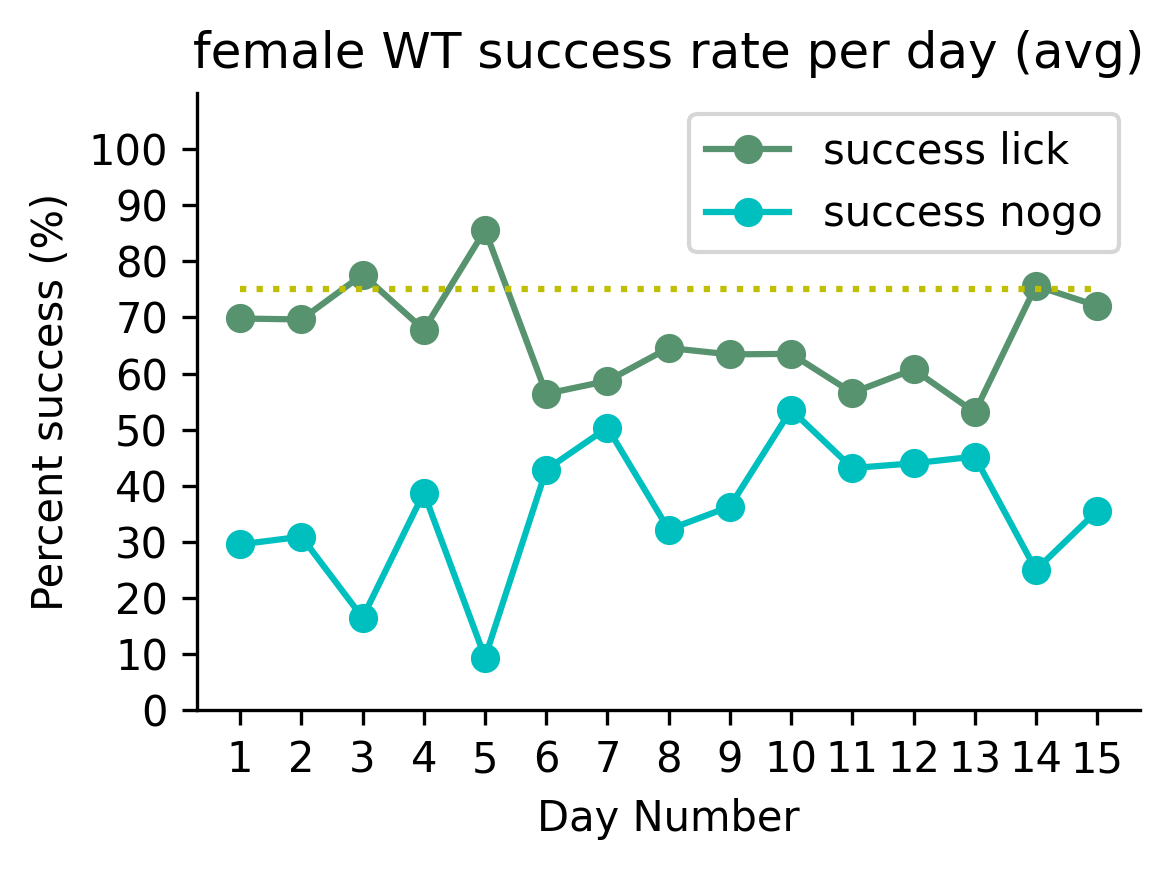

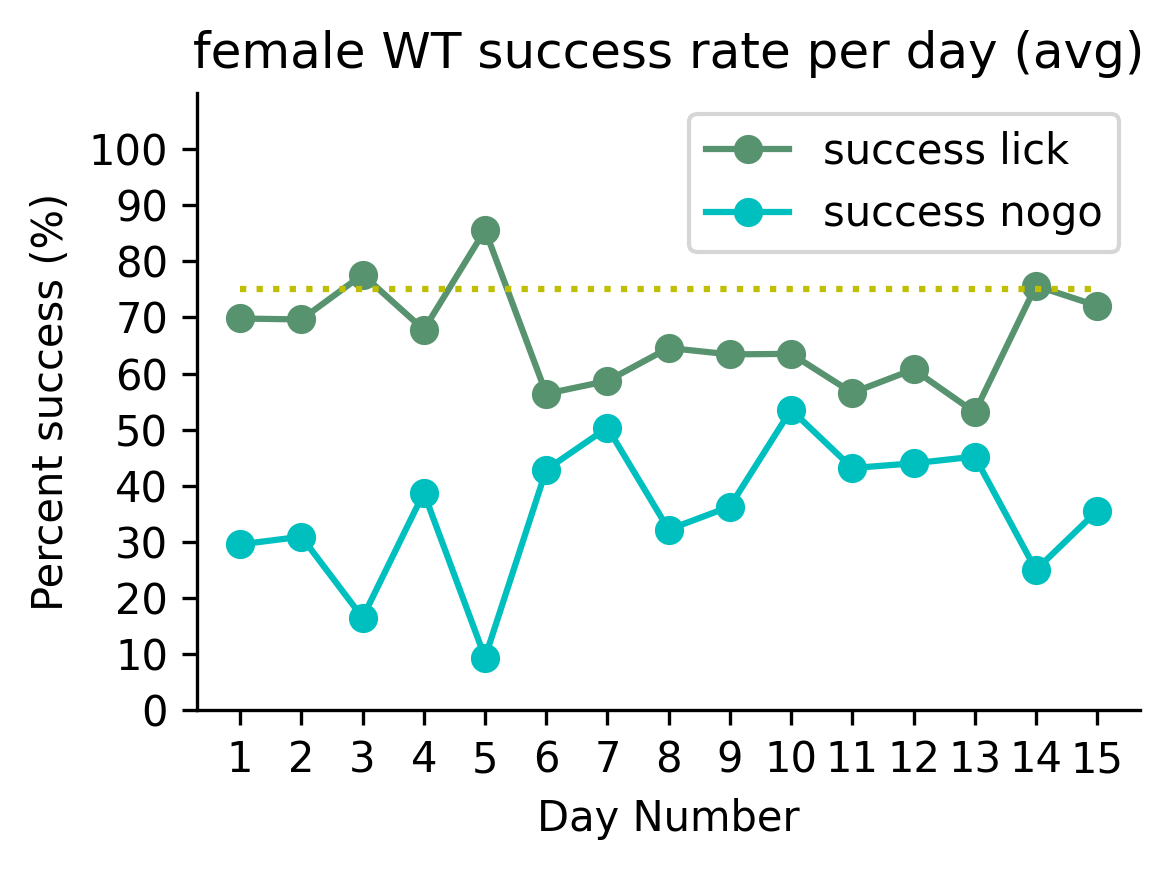

In [13]:
plot_averaged(average_WT_data, condition="WT", nogo = "TRUE", export_path_nogo=f"X:/RaymondLab/1_Kai/3_processed_data/7_lick_rate_csv/exported_figures/female_WT_averaged_lick_rates.png", dpi=300)